In [3]:
#Important functions to understand
#Sigmoid 

import numpy as np
import matplotlib.pyplot as plt
import math

x = list(range(-10,10,1))
y = [1/(1 + math.exp(-p)) for p in x]

plt.scatter(x,y)
plt.title("Sigmoid")

Text(0.5, 1.0, 'Sigmoid')

Text(0.5, 1.0, 'log(x)')

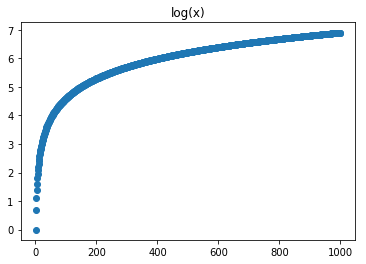

In [4]:
# Natural logarithm function
# x = list(range(1,1000,1))

x = list(range(1,1000,1))
y = [math.log(p) for p in x]

plt.scatter(x,y)
plt.title("log(x)")

Text(0.5, 1.0, 'log(1-x)')

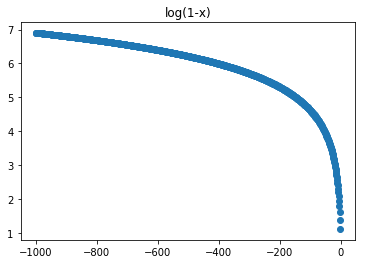

In [5]:
x = list(range(-1000,-1,1))
y = [math.log(1-p) for p in x]

plt.scatter(x,y)
plt.title("log(1-x)")

Text(0.5, 1.0, 'logit')

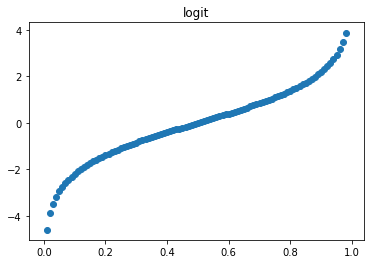

In [8]:
#Logit : inverse of sigmoid 
x = list(np.arange(0.01,0.99,0.01))
y = [math.log(p/(1-p)) for p in x]

plt.scatter(x,y)
plt.title("logit")

In [10]:
#Try try 
#Step1: Import packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
#Step2: Get data
#Info: Input & Output should be NumPy arrays or similar objects
#Input Array : 2 dimensional, One row for each observation, one 
#column for each feature.

#reshape function : reshape(-1,1) means as many rows as needed (-1) & 1 column
x = np.arange(10).reshape(-1,1)
print(x)
y = np.array([0,0,0,0,1,1,1,1,1,1])
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[0 0 0 0 1 1 1 1 1 1]


In [15]:
#Step3: Create model & fit it
#Info: args : 
#1. solver
#2. random_state
LogModel = LogisticRegression(solver='liblinear',random_state=0)
LogModel.fit(x,y)



LogisticRegression(random_state=0, solver='liblinear')

In [18]:
#Step4: Get Model Attributes
print(LogModel.classes_)

print(LogModel.intercept_)
print(LogModel.coef_)

[0 1]
[-1.04608067]
[[0.51491375]]


In [20]:
#Step5: Predict
print(LogModel.predict(x))
print(LogModel.predict_proba(x))

[0 0 0 1 1 1 1 1 1 1]
[[0.74002157 0.25997843]
 [0.62975524 0.37024476]
 [0.5040632  0.4959368 ]
 [0.37785549 0.62214451]
 [0.26628093 0.73371907]
 [0.17821501 0.82178499]
 [0.11472079 0.88527921]
 [0.07186982 0.92813018]
 [0.04422513 0.95577487]
 [0.02690569 0.97309431]]


In [26]:
#Step6: Accuracy 
LogModel.score(x,y)

confusion_matrix(y,LogModel.predict(x))


array([[3, 1],
       [0, 6]])

In [25]:
#More comprehensive report
print(classification_report(y,LogModel.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [28]:
#Improve the model by tweaking some hyperparams
#Regularization strength param C changed from 1 (default) to 10
LogModel2 = LogisticRegression(solver='liblinear',C=10,random_state=0)
LogModel2.fit(x,y)

LogisticRegression(C=10, random_state=0, solver='liblinear')

In [30]:
print(LogModel2.intercept_)
print(LogModel2.coef_)
print(LogModel2.score(x,y))


[-3.51335372]
[[1.12066084]]
1.0


Note: Log Reg doesnt work for data that is not linearly separable 


In [50]:
#Handwriting detection with logreg
#Step1: Import 
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [51]:
#Step2: Load data
x,y = load_digits(return_X_y=True) #return as a tuple

In [52]:
print(x)
print(x.shape)
print(y)
print(y.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797, 64)
[0 1 2 ... 8 9 8]
(1797,)


In [53]:
#Step3: Split into train test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [54]:
#Step4: Standardize data  
#todo: try with and without standardization : slightly better result without standardization. Dont think its required here. 
#why is it needed here? All units are same. 

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

#todo: understand fit_transform properly. 

In [55]:
#Step5: Model training 
LogModel3 = LogisticRegression(solver='liblinear',random_state=0,multi_class='ovr')
LogModel3.fit(x_train,y_train)

LogisticRegression(multi_class='ovr', random_state=0, solver='liblinear')

In [56]:
#Evaluate model
x_test = scaler.fit_transform(x_test)
y_pred = LogModel3.predict(x_test)

print(LogModel3.score(x_train,y_train))
print(LogModel3.score(x_test,y_test))

0.9867780097425192
0.9555555555555556


In [59]:
#Understand model output
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  1  0  1  0]
 [ 1  0 34  1  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  1  0  0  0 39  0  0  0  0]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  3  1  1  0  0  0  0 34  0]
 [ 0  0  0  0  0  1  0  2  1 37]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.87      0.94      0.90        35
           2       0.97      0.94      0.96        36
           3       0.94      1.00      0.97        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.93      1.00      0.96        39
           8       0.94      0.87      0.91        39
           9       1.00      0.90      0.95        41

    accuracy                           0.96       360
   macro avg       